In [2]:
# import dependencies
import pandas as pd
import numpy as np

from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import quandl as Quandl
import matplotlib.pyplot as plt

import math
import warnings

/Users/jogarro/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# notebook settings
plt.style.use('ggplot')
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
# get some stock data
df = Quandl.get('WIKI/GOOGL')

In [5]:
# inspect the head
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [6]:
# inspect the tail
df.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-08-17,942.95,943.8100,927.64,927.66,1653779.0,0.0,1.0,942.95,943.8100,927.64,927.66,1653779.0
2017-08-18,926.98,931.0200,923.45,926.18,1327288.0,0.0,1.0,926.98,931.0200,923.45,926.18,1327288.0
2017-08-21,925.77,928.2500,918.60,920.87,1292624.0,0.0,1.0,925.77,928.2500,918.60,920.87,1292624.0
2017-08-22,926.96,941.9617,926.17,940.40,1711377.0,0.0,1.0,926.96,941.9617,926.17,940.40,1711377.0
2017-08-23,937.00,945.4250,935.24,942.58,1126487.0,0.0,1.0,937.00,945.4250,935.24,942.58,1126487.0


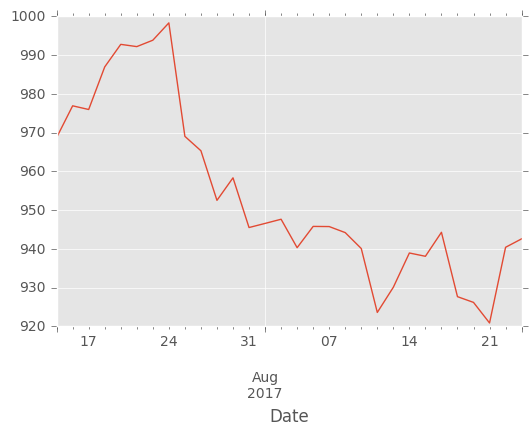

In [7]:
# closing price for last 30 days
df['Close'].tail(30).plot()

In [8]:
# only keep the features that we care about
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['H/L Pct'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['Pct Change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'H/L Pct', 'Pct Change', 'Adj. Volume']]

In [9]:
# quick look at our new frame
df.tail()

,Adj. Close,H/L Pct,Pct Change,Adj. Volume
Date,,,,
2017-08-17,927.66,1.740940,-1.621507,1653779.0
2017-08-18,926.18,0.522577,-0.086302,1327288.0
2017-08-21,920.87,0.801416,-0.529289,1292624.0
2017-08-22,940.40,0.166068,1.449901,1711377.0
2017-08-23,942.58,0.301831,0.595518,1126487.0


In [11]:
# remove NaNs
df.fillna(-9999, inplace=True)

In [13]:
# get our features and labels from the frame
forecast_days = 30
df['label'] = df['Adj. Close'].shift(-forecast_days)
df.dropna(inplace=True)

X = np.array(df.drop(['label'],1))
y = np.array(df['label'])

# normalize the data and drop any NaNs
X = preprocessing.scale(X)
df.dropna(inplace=True)

# convert our labels into an ndarray
y = np.array(df['label'])

In [14]:
# split our data into random train and test subsets
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [15]:
# train our classifier
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
# see how accurate our data is by running the test data through the model
accuracy = clf.score(X_train, y_train)
accuracy

0.9749907631205782

In [17]:
# forecast prices
price_forecasts = clf.predict(X_train)

In [18]:
# print coefficients, avg. squared error and variance
print('Coefficients: \n', clf.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_train, price_forecasts))
print('Variance score: %.2f' % r2_score(y_train, price_forecasts))

('Coefficients: \n', array([ 212.56892436,   -1.50143124,   -1.10318572,   -2.30949257]))
Mean squared error: 1177.48
Variance score: 0.97


In [19]:
# TODO: plot our regression line
# plt.figure()
# plt.title('Google Stockprice Forecast')
# plt.xlabel('Features')
# plt.ylabel('Adjusted Close')
# plt.scatter(X_train, y_train, color='black')
# plt.plot(X_train, price_forecasts, color='blue', linewidth=3)
# plt.show()